In [1]:
import mysql.connector
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# connection:
conn = mysql.connector.connect(
    host="127.0.0.1",
    user="root",
    password="pass123",
    database="banking_case"
)
#Engine
engine = create_engine(f"mysql+mysqlconnector://{"root"}:{"pass123"}@{"127.0.0.1"}/{"banking_case"}")

query = " Select * FROM banking_case.customer"
# Read SQL table 
df = pd.read_sql(query, engine)

conn.close()
print(df.head())

df.shape
df.info()


  ï»¿Client ID             Name  Age  Location ID Joined Bank  \
0     IND81288    Raymond Mills   24        34324  06-05-2019   
1     IND65833    Julia Spencer   23        42205  10-12-2001   
2     IND47499   Stephen Murray   27         7314  25-01-2010   
3     IND72498   Virginia Garza   40        34594  28-03-2019   
4     IND60181  Melissa Sanders   46        41269  20-07-2012   

    Banking Contact Nationality            Occupation Fee Structure  \
0    Anthony Torres    American  Safety Technician IV          High   
1  Jonathan Hawkins     African   Software Consultant          High   
2     Anthony Berry    European    Help Desk Operator          High   
3        Steve Diaz    American          Geologist II           Mid   
4        Shawn Long    American   Assistant Professor           Mid   

  Loyalty Classification  ...  Bank Deposits  Checking Accounts  \
0                   Jade  ...     1485828.64          603617.88   
1                   Jade  ...      641482.79    

               Age   Location ID  Estimated Income  Superannuation Savings  \
count  3000.000000   3000.000000       3000.000000             3000.000000   
mean     51.039667  21563.323000     171305.034263            25531.599673   
std      19.854760  12462.273017     111935.808209            16259.950770   
min      17.000000     12.000000      15919.480000             1482.030000   
25%      34.000000  10803.500000      82906.595000            12513.775000   
50%      51.000000  21129.500000     142313.480000            22357.355000   
75%      69.000000  32054.500000     242290.305000            35464.740000   
max      85.000000  43369.000000     522330.260000            75963.900000   

       Amount of Credit Cards  Credit Card Balance    Bank Loans  \
count             3000.000000          3000.000000  3.000000e+03   
mean                 1.463667          3176.206943  5.913862e+05   
std                  0.676387          2497.094709  4.575570e+05   
min                  1.00

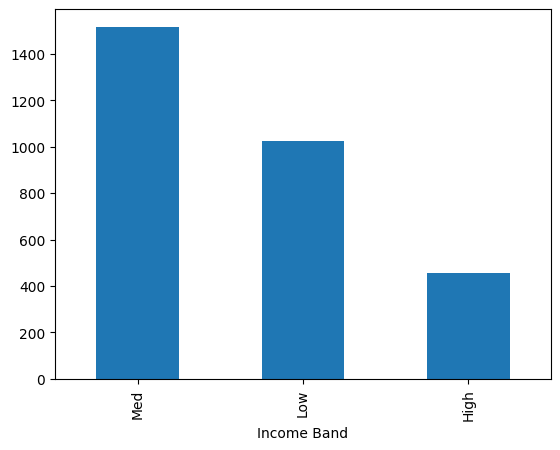

In [4]:
# Generating descriptive statistics
print(df.describe())

bins= [0,100000, 300000, float('inf')]
labels =['Low', 'Med', 'High']

df['Income Band']= pd.cut(df['Estimated Income'], bins=bins, labels=labels, right=False)
df['Income Band'].value_counts().plot(kind='bar')
plt.show()


Value Counts for 'BRId':
Axes(0.125,0.11;0.775x0.77)


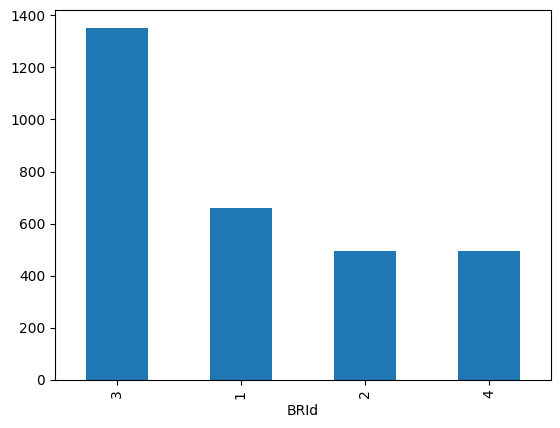

Value Counts for 'GenderId':
Axes(0.125,0.11;0.775x0.77)


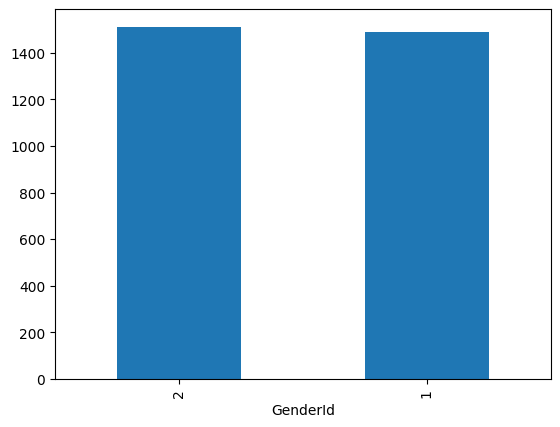

Value Counts for 'Amount of Credit Cards':
Axes(0.125,0.11;0.775x0.77)


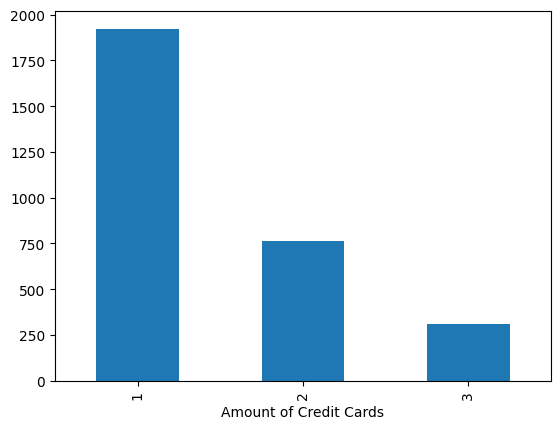

Value Counts for 'Nationality':
Axes(0.125,0.11;0.775x0.77)


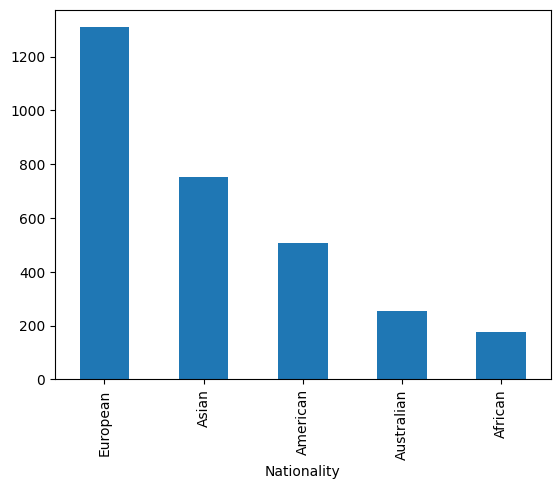

Value Counts for 'Occupation':
Axes(0.125,0.11;0.775x0.77)


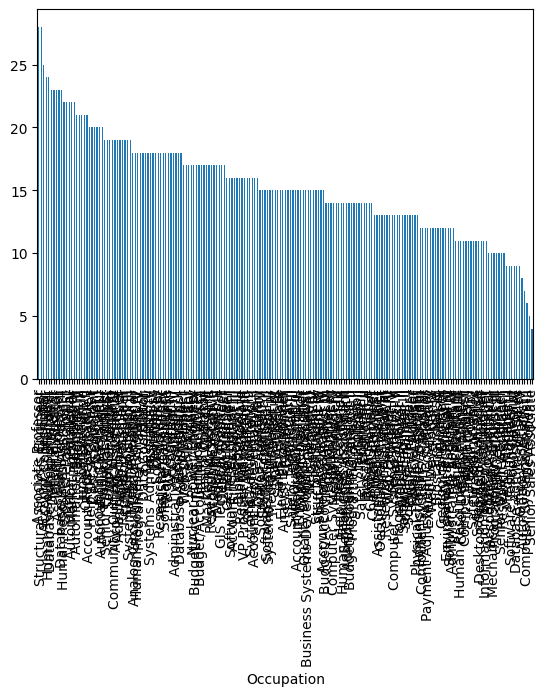

Value Counts for 'Fee Structure':
Axes(0.125,0.11;0.775x0.77)


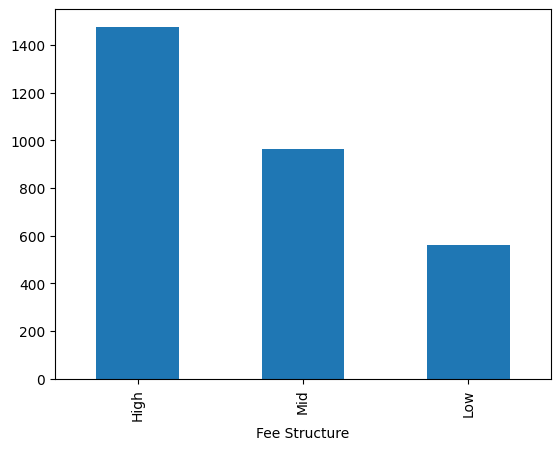

Value Counts for 'Loyalty Classification':
Axes(0.125,0.11;0.775x0.77)


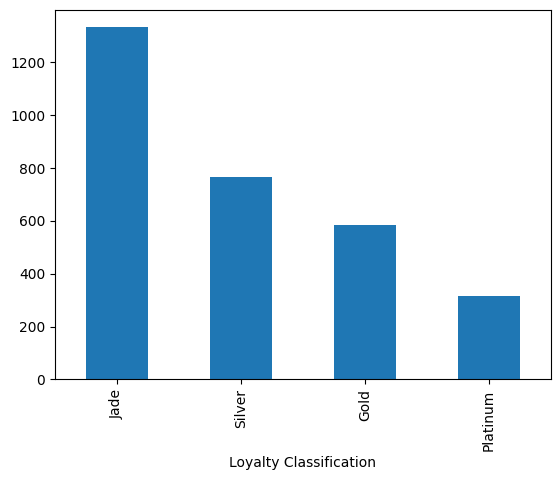

Value Counts for 'Properties Owned':
Axes(0.125,0.11;0.775x0.77)


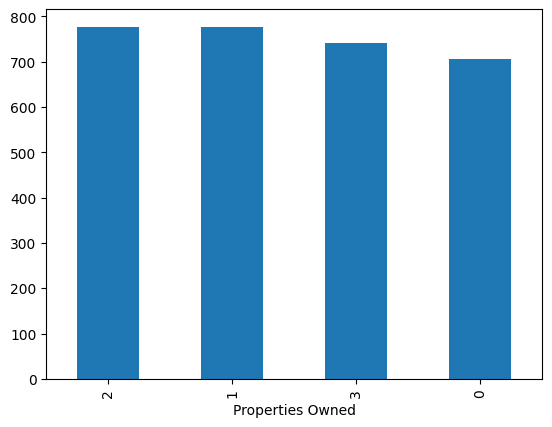

Value Counts for 'Risk Weighting':
Axes(0.125,0.11;0.775x0.77)


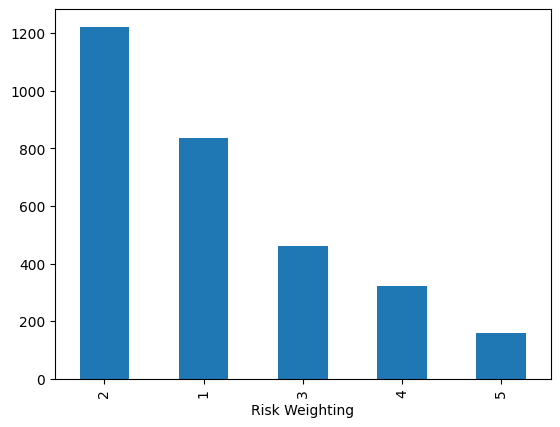

Value Counts for 'IAId':
Axes(0.125,0.11;0.775x0.77)


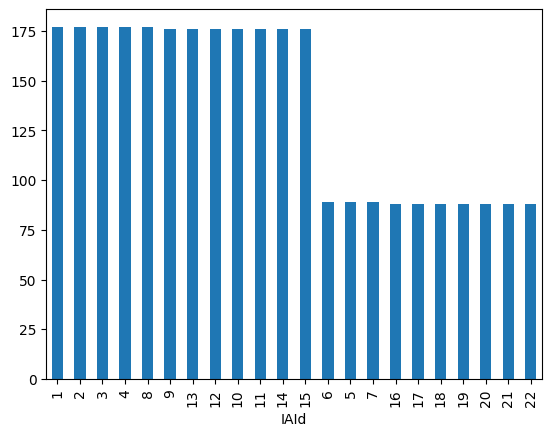

Value Counts for 'Income Band':
Axes(0.125,0.11;0.775x0.77)


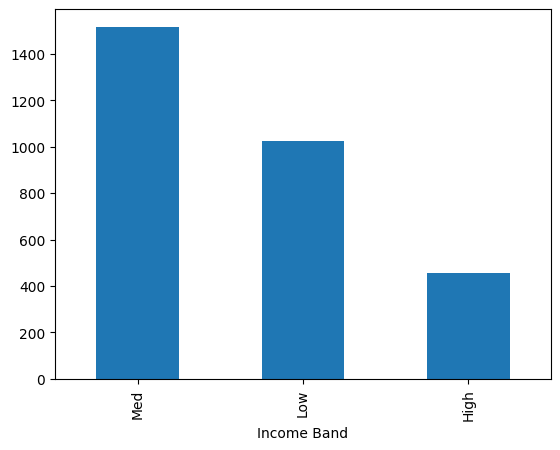

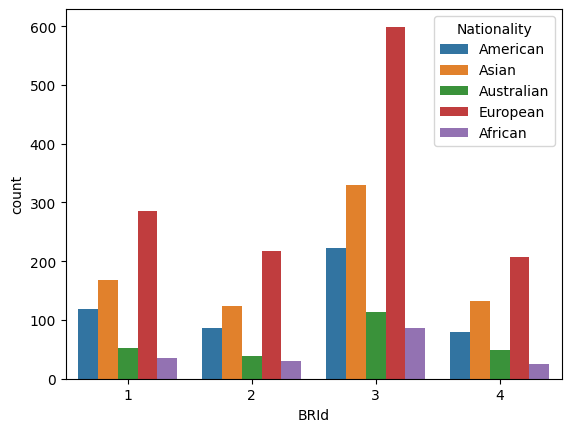

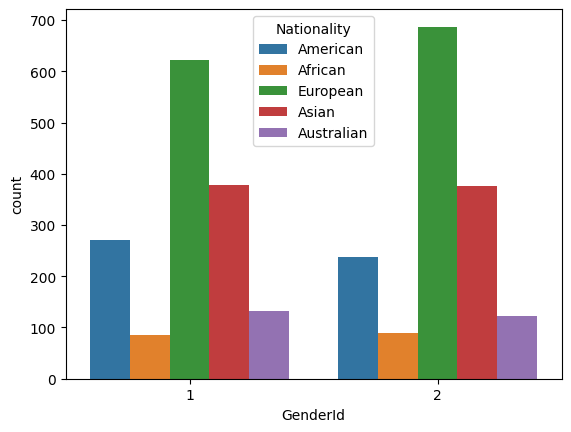

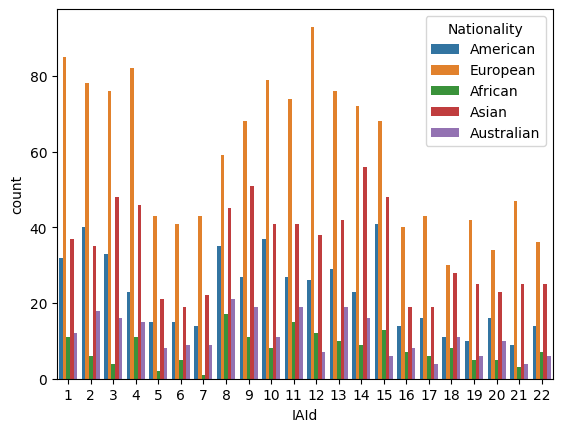

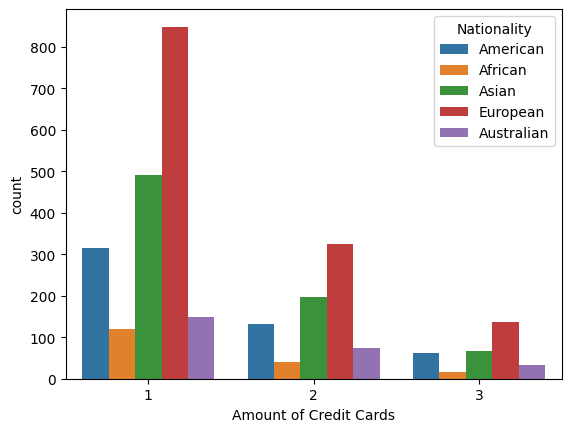

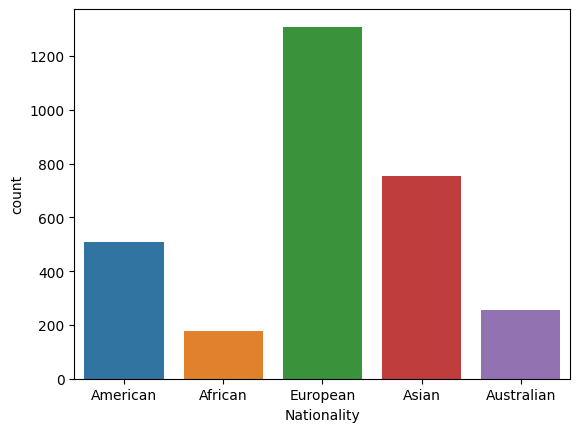

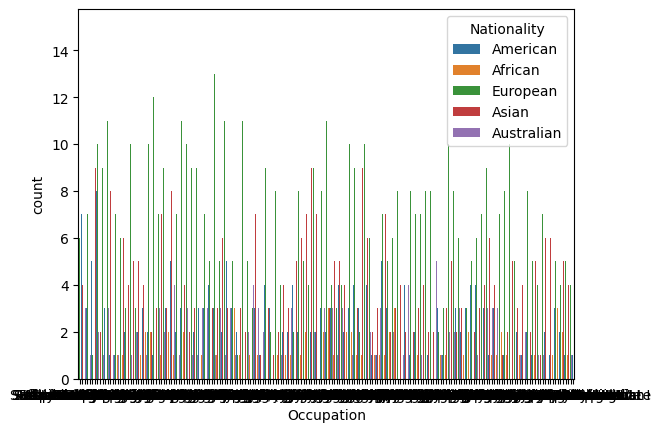

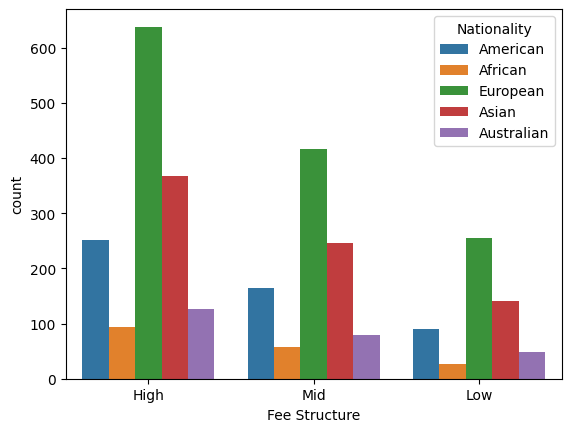

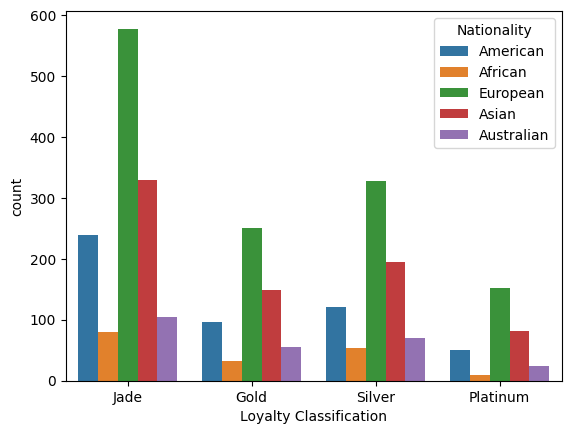

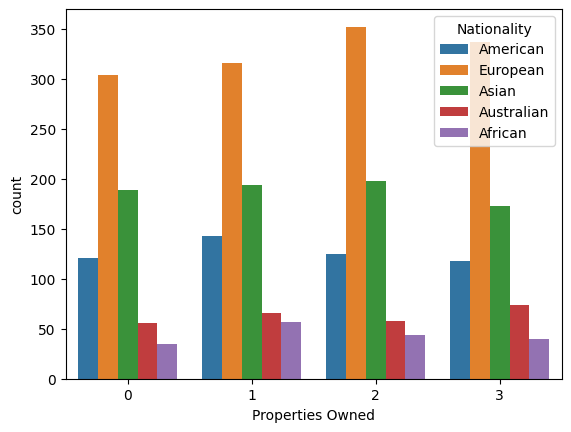

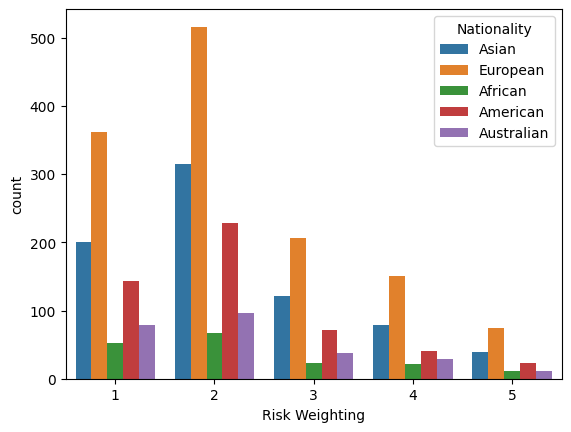

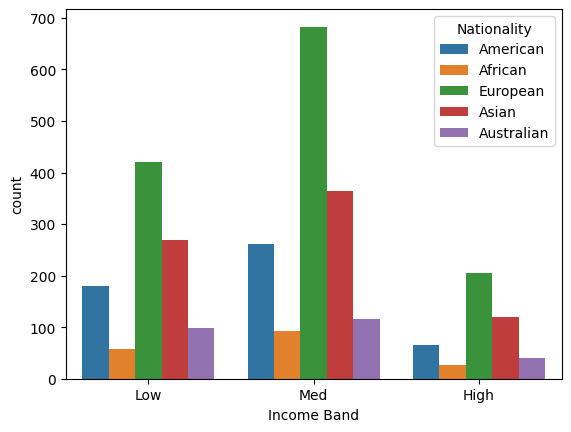

In [5]:
#Examine the distribution of unique categories in categorical columns
#categorical_cols= df["BRId", "GenderId", "IAId","Income Band", "Amount of Credit Cards", "Nationality","Occupation", "Fee Structure", "Loyalty Classification", "Properties Owned", "Risk Weighting"    ]
categorical_cols = ["BRId", "GenderId", "Amount of Credit Cards", "Nationality", "Occupation",
                    "Fee Structure", "Loyalty Classification", "Properties Owned",
                    "Risk Weighting", "IAId", "Income Band"]
for col in categorical_cols:
    print(f"Value Counts for '{col}':")
    print(df[col].value_counts().plot(kind='bar'))
    plt.show()

for i, predictor in enumerate(df[["BRId", "GenderId","IAId","Amount of Credit Cards", "Nationality", "Occupation", "Fee Structure", "Loyalty Classification", "Properties Owned", "Risk Weighting", "Income Band"]].columns):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='Nationality')

In [ ]:
# Histplot of value counts for different occupation
    for col in categorical_cols:
        if col=="occupation":
            continue
        plt.figure(figsize=(8,4))
        sns.histplot(df[col])
        plt.title('Histogram of Occupation Count')
        plt.xlabel(col)
        plt.ylabel("count")
        plt.show()